In [1]:
import MEArec as mr
import MEAutility as mu
import yaml
from pprint import pprint
import matplotlib.pylab as åøt
%matplotlib notebook

## Load default configuration files

First, let's load the default configuration of MEArec

In [2]:
default_info, mearec_home = mr.get_default_config()
pprint(default_info)

{'cell_models_folder': 'C:\\Users\\McDonaldMatthew\\.config\\mearec\\cell_models\\bbp',
 'recordings_folder': 'C:\\Users\\McDonaldMatthew\\.config\\mearec\\recordings',
 'recordings_params': 'C:\\Users\\McDonaldMatthew\\.config\\mearec\\default_params\\recordings_params.yaml',
 'templates_folder': 'C:\\Users\\McDonaldMatthew\\.config\\mearec\\templates',
 'templates_params': 'C:\\Users\\McDonaldMatthew\\.config\\mearec\\default_params\\templates_params.yaml'}


## Generating and saving templates

In [3]:
# define cell_models folder
cell_folder = default_info['cell_models_folder']
template_params = mr.get_default_templates_params()
pprint(template_params)

{'cut_out': [2, 5],
 'delay': 10,
 'drift_steps': 30,
 'drift_xlim': [-10, 10],
 'drift_ylim': [-10, 10],
 'drift_zlim': [20, 80],
 'drifting': False,
 'dt': 0.03125,
 'max_drift': 100,
 'min_amp': 30,
 'min_drift': 30,
 'n': 50,
 'ncontacts': 10,
 'offset': 0,
 'overhang': 30,
 'probe': 'Neuronexus-32',
 'rot': 'physrot',
 'seed': None,
 'sim_time': 1,
 'target_spikes': [3, 50],
 'weights': [0.25, 1.75],
 'xlim': [10, 80],
 'ylim': None,
 'zlim': None}


Now let's change a few parameters and generate templates.

In [5]:
template_params['n'] = 20
template_params['probe'] = 'tetrode-mea-l'
# the templates are not saved, but the intracellular simulations are saved in 'templates_folder'
tempgen = mr.gen_templates(cell_models_folder=cell_folder, params=template_params)
# this will take a few minutes...




Simulation time:  70.03036069869995 





The `tempgen` variable is a `TemplateGenerator` object. It contains the `templates`, `locations`, `rotations`, and `celltypes` of the generated templates.

In [8]:
print('Templates shape', tempgen.templates.shape)
print('Sample locations', tempgen.locations[:3])
print('Sample rotations', tempgen.rotations[:3])
print('Sample cell types', tempgen.celltypes[:3])

Templates shape (260, 4, 224)
Sample locations [[ 12.60585686  -8.44696713 -18.76814015]
 [ 15.28139934   9.59408329  22.46865074]
 [ 21.05947555  -4.2264632  -25.99932262]]
Sample rotations [[ 1.38791659  0.10251427  2.10591904]
 [ 1.5443928  -0.01483304  1.86973377]
 [ 1.71041969 -0.21127772  2.7999062 ]]
Sample cell types ['L5_BP_bAC217_1' 'L5_BP_bAC217_1' 'L5_BP_bAC217_1']


We can now save the `TemplateGenerator` object in h5 format.

In [9]:
# save templates in h5 format
mr.save_template_generator(tempgen, filename='test/test_templates.h5')


Saved  templates in test\test_templates.h5 



## Generating and saving recordings

Once the templates have been generated, we can use them to generate recordings. Let's fisrt load and take a look at the default parameters:

In [10]:
recordings_params = mr.get_default_recordings_params()
pprint(recordings_params)

{'cell_types': {'excitatory': ['PC', 'SS', 'SP'],
                'inhibitory': ['AC',
                               'BP',
                               'BC',
                               'BTC',
                               'ChC',
                               'DBC',
                               'MC',
                               'NGC']},
 'recordings': {'angle_tol': 15,
                'bursting': False,
                'bursting_sigmoid': 30.0,
                'chunk_conv_duration': 20,
                'chunk_filter_duration': 0,
                'chunk_noise_duration': 0,
                'color_noise_floor': 1,
                'color_peak': 300,
                'color_q': 2,
                'drift_velocity': 5,
                'drifting': False,
                'dtype': 'float32',
                'exp_decay': 0.2,
                'extract_waveforms': False,
                'far_neurons_exc_inh_ratio': 0.8,
                'far_neurons_max_amp': 10,
                'far_neu

Similarly to the templates generation, we can change th eparameters that we pass to the `gen_recordings` function.
In this case we will keep the default parameters.

In [11]:
recgen = mr.gen_recordings(templates='test/test_templates.h5', params=recordings_params)

Spiketrains seed:  1549
Noise Level  10
Templates selection seed:  7277
Selecting cells
Selecting Excitatory and Inhibitory cells
Min dist:  25 Min amp:  40
Amplitude or boundary violation 30.22937865609491 [ 31.74815842  -6.95253114 -50.7800176 ] 2
Distance violation 21.885479371875334 3
Distance violation 16.67680339821186 6
Distance violation 20.11071706822483 8
Distance violation 17.296646136274827 9
Distance violation 14.47744073050492 11
Amplitude or boundary violation 31.223685433597602 [ 74.63678609   7.2747902  -29.0378004 ] 13
Distance violation 21.957056605285015 14
Distance violation 22.423859046918647 15
Distance violation 11.45310734425325 16
Amplitude or boundary violation 37.60371021754526 [ 39.28036055 -17.75694511  21.63970781] 18
Distance violation 18.460859396815874 19
Distance violation 15.122803279650565 20
Distance violation 7.6646137034288895 21
Distance violation 15.8252444522186 22
Distance violation 20.280420346055806 24
Distance violation 20.14405453005301 2

c:\users\mcdonaldmatthew\pycharmprojects\organoidmea\venv\lib\site-packages\quantities\quantity.py:321: RuntimeWarning: divide by zero encountered in true_divide
  return np.true_divide(other, self)
c:\users\mcdonaldmatthew\pycharmprojects\organoidmea\venv\lib\site-packages\MEAutility\core.py:332: RuntimeWarning: invalid value encountered in true_divide
  self.normal /= np.linalg.norm(self.normal)


Elapsed pad time: 6.514189004898071
Creating time jittering
Elapsed jitter time: 16.757310152053833
Computing spike train SNR
Adding spiketrain annotations
Electrode modulaton
Starting convolution with spike: 0 shape modulation: False
Done convolution with spike  0
Starting convolution with spike: 1 shape modulation: False
Done convolution with spike  1
Starting convolution with spike: 2 shape modulation: False
Done convolution with spike  2
Starting convolution with spike: 3 shape modulation: False
Done convolution with spike  3
Starting convolution with spike: 4 shape modulation: False
Done convolution with spike  4
Starting convolution with spike: 5 shape modulation: False
Done convolution with spike  5
Starting convolution with spike: 6 shape modulation: False
Done convolution with spike  6
Starting convolution with spike: 7 shape modulation: False
Done convolution with spike  7
Starting convolution with spike: 8 shape modulation: False
Done convolution with spike  8
Starting convo

c:\users\mcdonaldmatthew\pycharmprojects\organoidmea\venv\lib\site-packages\MEArec\generators\recordinggenerator.py:653: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  tmp_rec = h5py.File(tmp_rec_path)


Filtering
Band-pass cutoff [ 300. 6000.] Hz
Elapsed time:  23.67766547203064


The `recgen` variable is a `RecordingGenerator` object. It contains the selected `templates`, `template_locations`, `template_rotations`, and `template_celltypes`, as well as `spiketrains` and `recordings`.

In [20]:
print('Recordings shape', recgen.recordings.shape)
print('Selected templates shape', recgen.recordings.shape)
print('Sample template locations', recgen.template_locations[:3])
print('Number of neurons', len(recgen.spiketrains))
print('Sample spike train', recgen.spiketrains[0].times)

Recordings shape (4, 320000)
Selected templates shape (4, 320000)
Sample template locations [[ 19.03916606  17.23196481 -19.41383549]
 [ 10.33364943  -9.23020255 -40.87380712]
 [ 31.04020796  -2.67721702  29.28667192]]
Number of neurons 10
Sample spike train [0.10181396 0.34908094 0.45597526 0.98063677 1.00878555 1.19220817
 1.19450274 1.2016842  1.25237349 1.65646572 1.86045882 1.9011772
 2.12122498 2.25159977 2.39157696 2.57537333 2.6734053  3.30049967
 3.40448604 3.42193314 3.42793356 3.57683541 3.67996266 4.10755978
 4.24303025 4.38823766 4.41628602 4.47338683 4.48021289 4.52649339
 4.90292831 4.91102775 5.54193391 5.56139994 5.60404284 5.81863222
 6.08785607 6.27332622 6.73743726 7.14247012 7.15525799 7.21868057
 7.71493775 7.73409778 8.10603054 8.19264343 8.62454335 8.78366041
 8.93282173 8.97808807 9.11657544 9.17476321 9.4917575  9.53891106
 9.69460504 9.7112557  9.73433511] s


We can now save the `RecordingGenerator` object to h5 format.

In [13]:
# save recordings in h5 format
mr.save_recording_generator(recgen, filename='test/test_recordings.h5')


Saved recordings in test\test_recordings.h5 



## Plotting the templates and recordings

`MEArec` implements some basic plotting functions.

c:\users\mcdonaldmatthew\pycharmprojects\organoidmea\venv\lib\site-packages\MEArec\tools.py:3179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_t = fig.add_subplot(111)


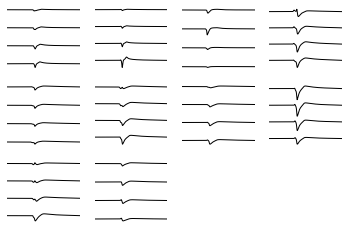

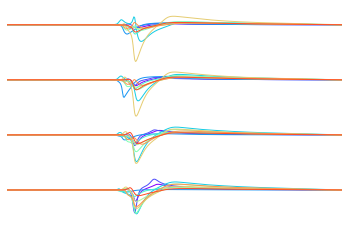

In [14]:
# plot templates
mr.plot_templates(recgen, single_axes=False, ncols=4)
mr.plot_templates(recgen, single_axes=True, cmap='rainbow')

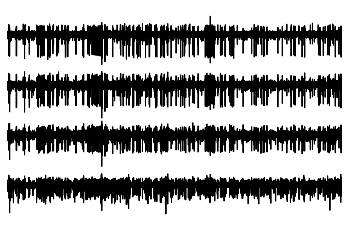

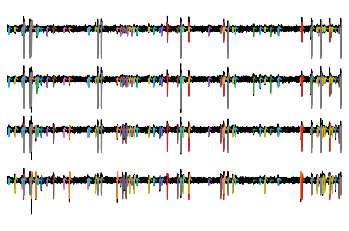

In [15]:
mr.plot_recordings(recgen)
mr.plot_recordings(recgen, start_time=0, end_time=1, overlay_templates=True)

max electrode:  0
max electrode:  0
max electrode:  2
max electrode:  1
max electrode:  2
max electrode:  0
max electrode:  0
max electrode:  3
max electrode:  0
max electrode:  2


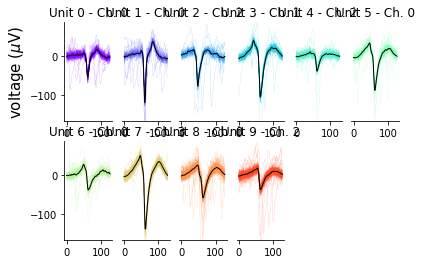

In [16]:
mr.plot_waveforms(recgen, electrode='max', cmap='rainbow')

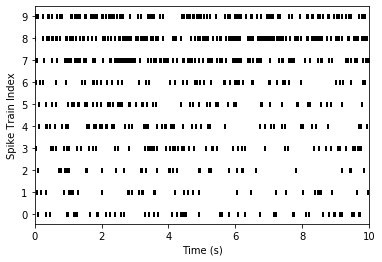

In [19]:
mr.plot_rasters(recgen.spiketrains)

Fitting PCA of 2 dimensions on 3072 waveforms


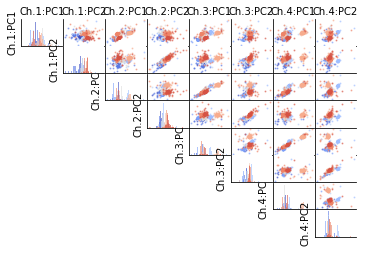

In [21]:
_ = mr.plot_pca_map(recgen, cmap='coolwarm')